In [7]:
raw_text = """
1 Регрессия для IC50
Модель	MAE	MSE	R2
Linear Regression	208.101517	146214.545100	0.561653
Random Forest	34.494652	62507.833582	0.812603
SVR	211.161286	278467.017302	0.165165

2 Регрессия для CC50
Модель	MAE	MSE	R2
Linear Regression	9675.622306	1.713905e+10	-36381.654945
Random Forest	300.990410	2.580495e+05	0.452214
SVR	343.829193	3.509347e+05	0.255038

3 Регрессия для SI
Модель	MAE	MSE	R2
Linear Regression	14418.079515	4.026913e+10	-19932.991925
Random Forest	201.466911	1.842788e+06	0.087785
CatBoost	193.961846	1.837325e+06	0.090489
XGBoost	192.528314	1.837311e+06	0.090496

4 превышает ли значение CC50 медиану
Модель	Accuracy	F1	ROC-AUC
Logistic Regression	0.720	0.738318	0.720
Random Forest	0.740	0.759259	0.740
CatBoost	0.755	0.765550	0.755
XGBoost	0.770	0.780952	0.770

5 превышает ли значение IC50 медиану
Модель	Accuracy	F1	ROC-AUC
Logistic Regression	0.700	0.714286	0.700
Random Forest	0.745	0.758294	0.745
CatBoost	0.720	0.730769	0.720
XGBoost	0.705	0.712195	0.705

6 превышает ли значение SI медиану
Модель	Accuracy	F1	ROC-AUC
Logistic Regression	0.62	0.616162	0.62
Random Forest	0.66	0.630435	0.66
CatBoost	0.62	0.620000	0.62
XGBoost	0.62	0.612245	0.62

7 превышает ли значение SI > 8
Модель	Accuracy	F1	ROC-AUC
Logistic Regression	0.695	0.573427	0.668577
CatBoost	0.670	0.535211	0.639699
XGBoost	0.720	0.605634	0.694290
"""

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [9]:
# Разбиваем по задачам
tasks = raw_text.strip().split('\n\n')

# Списки под данные
regression_data = []
classification_data = []

for task_block in tasks:
    lines = task_block.strip().split('\n')
    task_name = lines[0].strip()
    headers = lines[1].strip().split('\t')

    for line in lines[2:]:
        parts = line.strip().split('\t')
        model = parts[0]
        values = list(map(float, parts[1:]))

        if 'R2' in headers:
            regression_data.append([task_name, model] + values)
        else:
            classification_data.append([task_name, model] + values)

# Превращаем в DataFrame
regression_df = pd.DataFrame(regression_data, columns=["Задача", "Модель", "MAE", "MSE", "R2"])
classification_df = pd.DataFrame(classification_data, columns=["Задача", "Модель", "Accuracy", "F1", "ROC-AUC"])

# Показываем
display(regression_df)
display(classification_df)

,Задача,Модель,MAE,MSE,R2
0,1 Регрессия для IC50,Linear Regression,208.101517,1.462145e+05,0.561653
1,1 Регрессия для IC50,Random Forest,34.494652,6.250783e+04,0.812603
2,1 Регрессия для IC50,SVR,211.161286,2.784670e+05,0.165165
3,2 Регрессия для CC50,Linear Regression,9675.622306,1.713905e+10,-36381.654945
4,2 Регрессия для CC50,Random Forest,300.990410,2.580495e+05,0.452214
5,2 Регрессия для CC50,SVR,343.829193,3.509347e+05,0.255038
6,3 Регрессия для SI,Linear Regression,14418.079515,4.026913e+10,-19932.991925
7,3 Регрессия для SI,Random Forest,201.466911,1.842788e+06,0.087785
8,3 Регрессия для SI,CatBoost,193.961846,1.837325e+06,0.090489
9,3 Регрессия для SI,XGBoost,192.528314,1.837311e+06,0.090496


,Задача,Модель,Accuracy,F1,ROC-AUC
0,4 превышает ли значение CC50 медиану,Logistic Regression,0.720,0.738318,0.720000
1,4 превышает ли значение CC50 медиану,Random Forest,0.740,0.759259,0.740000
2,4 превышает ли значение CC50 медиану,CatBoost,0.755,0.765550,0.755000
3,4 превышает ли значение CC50 медиану,XGBoost,0.770,0.780952,0.770000
4,5 превышает ли значение IC50 медиану,Logistic Regression,0.700,0.714286,0.700000
5,5 превышает ли значение IC50 медиану,Random Forest,0.745,0.758294,0.745000
6,5 превышает ли значение IC50 медиану,CatBoost,0.720,0.730769,0.720000
7,5 превышает ли значение IC50 медиану,XGBoost,0.705,0.712195,0.705000
8,6 превышает ли значение SI медиану,Logistic Regression,0.620,0.616162,0.620000
9,6 превышает ли значение SI медиану,Random Forest,0.660,0.630435,0.660000


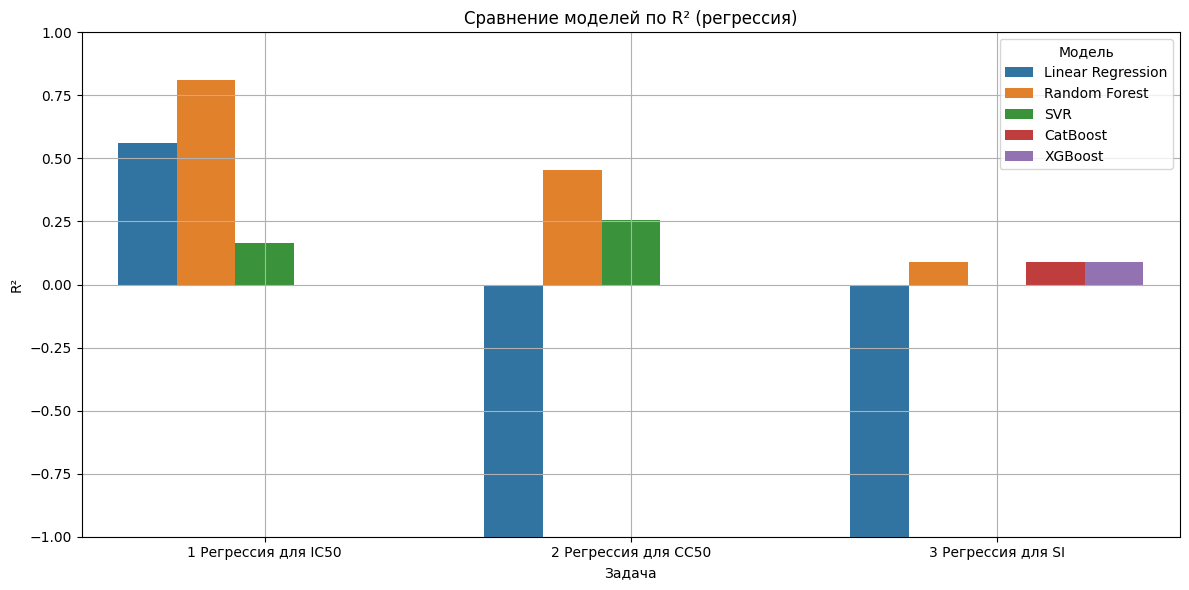

In [10]:
# Группируем только по регрессиям
plt.figure(figsize=(12, 6))
sns.barplot(data=regression_df, x="Задача", y="R2", hue="Модель")
plt.title("Сравнение моделей по R² (регрессия)")
plt.ylabel("R²")
plt.xlabel("Задача")
plt.ylim(-1, 1)
plt.legend(title="Модель")
plt.grid(True)
plt.tight_layout()
plt.show()

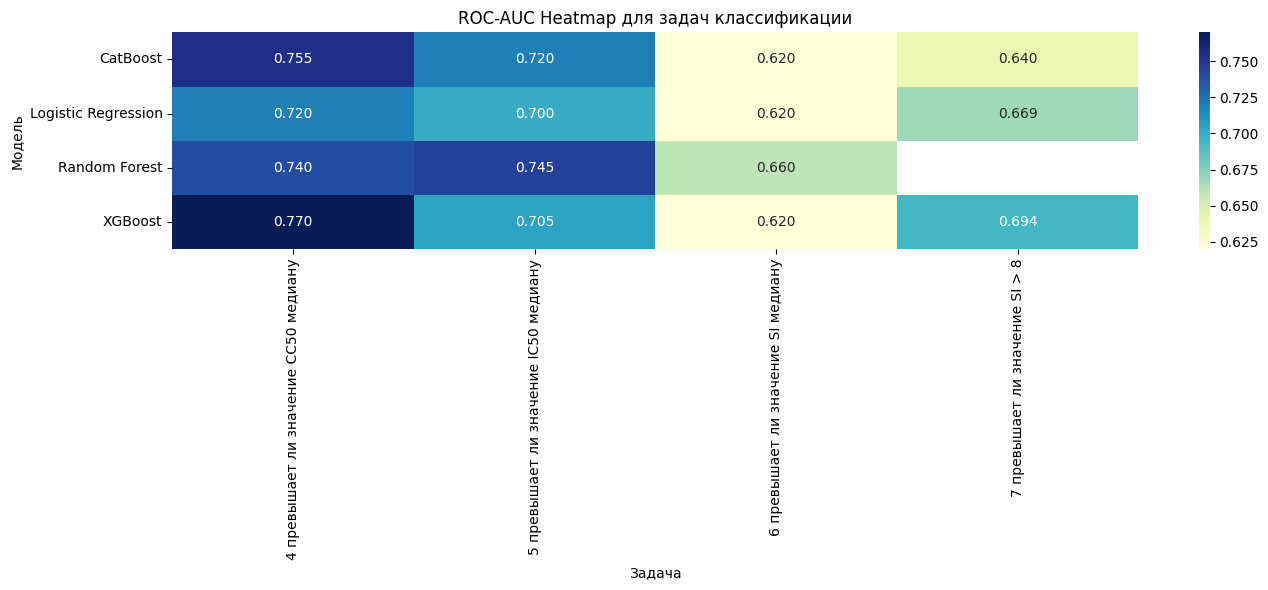

In [11]:
# Построим сводную таблицу: Задача x Модель по ROC-AUC
heatmap_df = classification_df.pivot(index="Модель", columns="Задача", values="ROC-AUC")

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("ROC-AUC Heatmap для задач классификации")
plt.ylabel("Модель")
plt.xlabel("Задача")
plt.tight_layout()
plt.show()

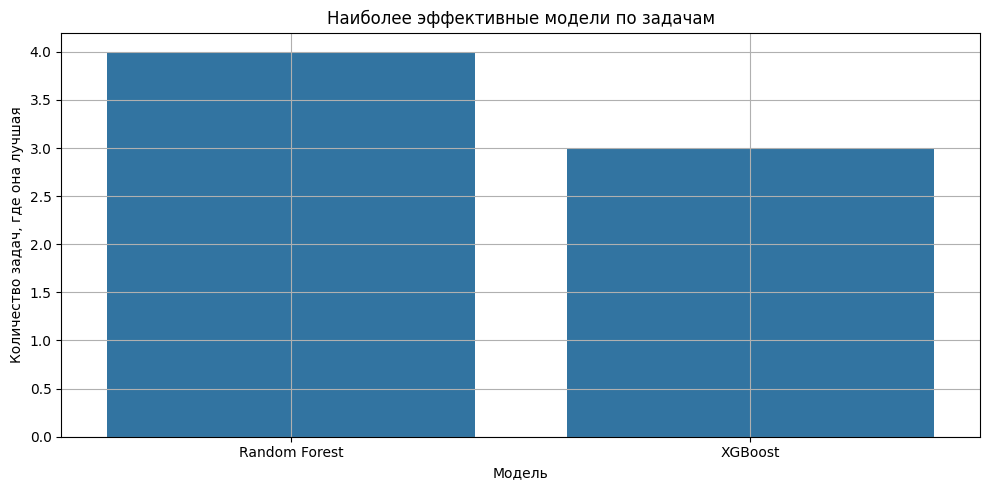

In [12]:
# Таблица лучших моделей по задачам
best_models = {
    "Регрессия IC50": "Random Forest",
    "Регрессия CC50": "Random Forest",
    "Регрессия SI": "XGBoost",
    "IC50 > median": "Random Forest",
    "CC50 > median": "XGBoost",
    "SI > median": "Random Forest",
    "SI > 8": "XGBoost"
}

plt.figure(figsize=(10, 5))
sns.countplot(x=list(best_models.values()))
plt.title("Наиболее эффективные модели по задачам")
plt.xlabel("Модель")
plt.ylabel("Количество задач, где она лучшая")
plt.grid(True)
plt.tight_layout()
plt.show()